In [34]:
!pip install -U scikit-learn

You should consider upgrading via the 'C:\Users\sangeetha\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [60]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,precision_score,f1_score,confusion_matrix,classification_report,recall_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pickle

In [2]:
df = pd.read_csv(r"Downloads\Copper_Set.xlsx - Result 1.csv")
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [3]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [5]:
df['item_date'] = pd.to_datetime(df['item_date'],format = '%Y%m%d',errors = 'coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'],errors = 'coerce')
df['customer'] = pd.to_numeric(df['customer'],errors = 'coerce')
df['country'] = pd.to_numeric(df['country'],errors = 'coerce')
df['application'] = pd.to_numeric(df['application'],errors = 'coerce')
df['thickness'] = pd.to_numeric(df['thickness'],errors = 'coerce')
df['width'] = pd.to_numeric(df['width'],errors = 'coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'],errors = 'coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'],format = '%Y%m%d',errors = 'coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'],errors = 'coerce')
df


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,1001149,164141591,2020-07-01,601.00


In [6]:
df.isnull().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [7]:
df.drop('id',axis = 1,inplace =True)
df['material_ref'].fillna('unknown',inplace = True)
df.dropna(inplace = True)
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00
181669,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00
181670,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00
181671,2020-07-02,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,1001149,164141591,2020-07-01,601.00


In [8]:
df.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [9]:
df1 = df.copy()

In [10]:
df1

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00
181669,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00
181670,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00
181671,2020-07-02,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,1001149,164141591,2020-07-01,601.00


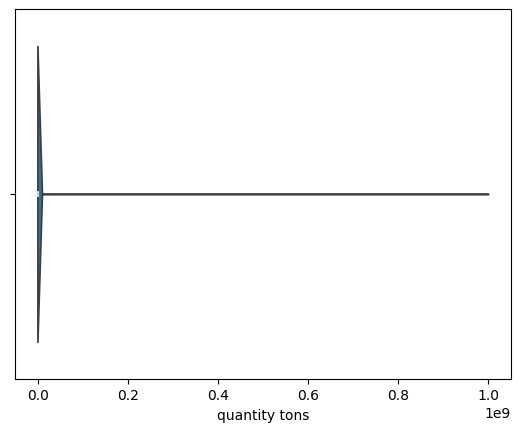

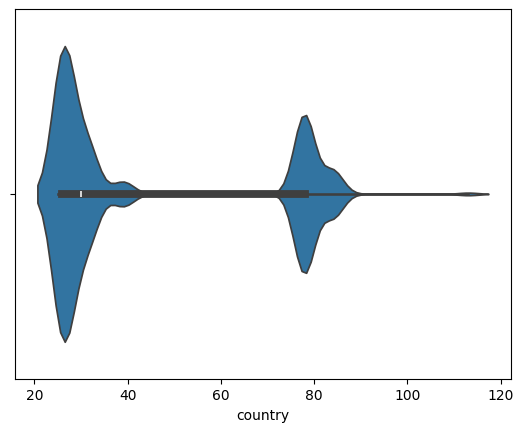

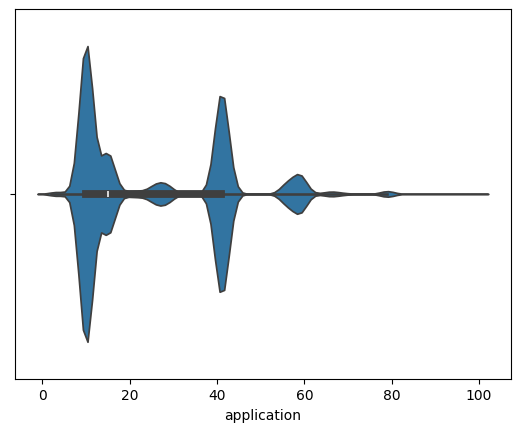

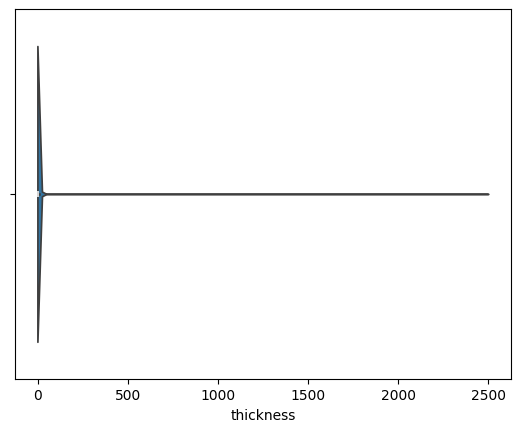

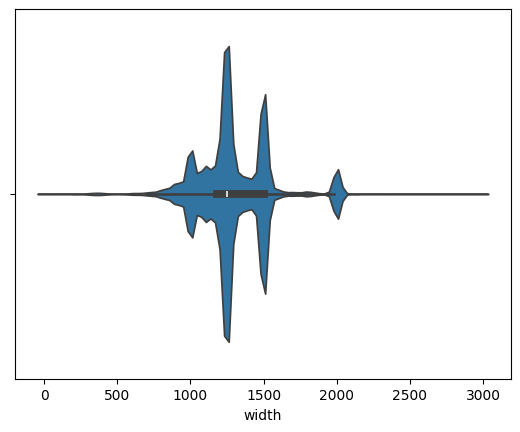

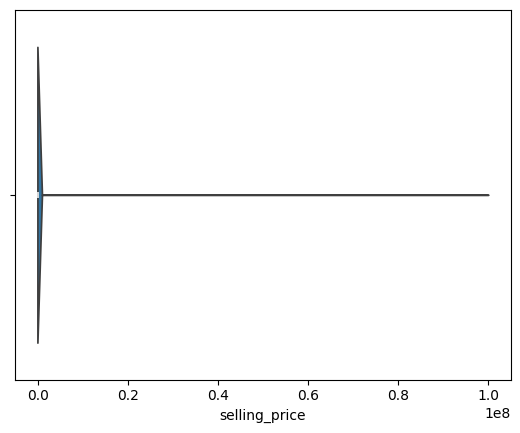

In [11]:
fig = sns.violinplot(df1,x = 'quantity tons')
plt.show()

fig1 = sns.violinplot(df1, x = 'country')
plt.show()

fig2 = sns.violinplot(df1, x = 'application')
plt.show()

fig3 = sns.violinplot(df1, x = 'thickness')
plt.show()

fig4 = sns.violinplot(df1, x = 'width')
plt.show()

fig5 = sns.violinplot(df1, x = 'selling_price')
plt.show()

In [12]:
mask = df1['quantity tons'] <= 0
mask1 = df1['thickness'] <= 0
mask2 = df1['selling_price'] <= 0

print(mask.sum())
print(mask1.sum())
print(mask2.sum())

4
0
7


In [13]:
df1.loc[mask,'quantity tons'] = np.nan
df1.loc[mask2,'selling_price'] = np.nan

In [14]:
df1.isnull().sum()

item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

In [15]:
df1.dropna(inplace = True)

In [17]:
df1.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [18]:
df1['quantity_tons_log'] = np.log(df1['quantity tons'])
df1['thickness_log'] = np.log(df1['thickness'])
df1['selling_price_log'] = np.log(df1['selling_price'])

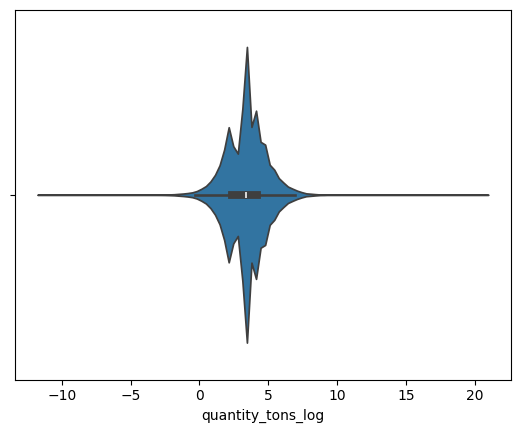

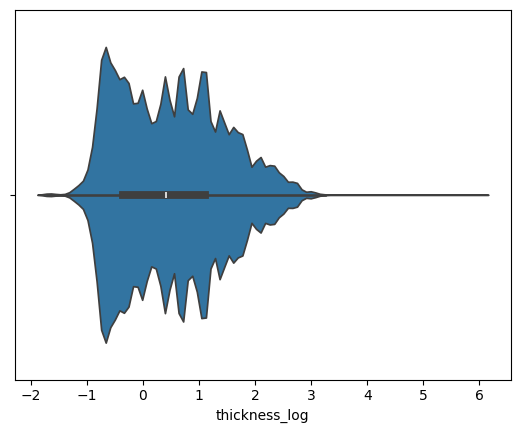

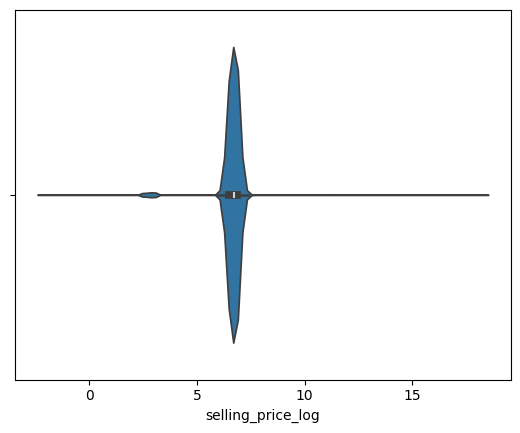

In [19]:
sns.violinplot(df1, x = 'quantity_tons_log')
plt.show()
sns.violinplot(df1, x = 'thickness_log')
plt.show()
sns.violinplot(df1, x = 'selling_price_log')             
plt.show()

In [20]:
df1

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity_tons_log,thickness_log,selling_price_log
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,5.310301,0.832909,6.643790
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,2020-07-02,106.783299,30200854.0,25.0,Won,W,41.0,0.96,1240.0,1000222,164141591,2020-07-01,602.00,4.670802,-0.040822,6.400257
181668,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00,4.629691,-0.040822,6.381816
181669,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00,5.337954,-0.051293,6.378426
181670,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00,1.443523,-0.342490,6.428105


<Axes: >

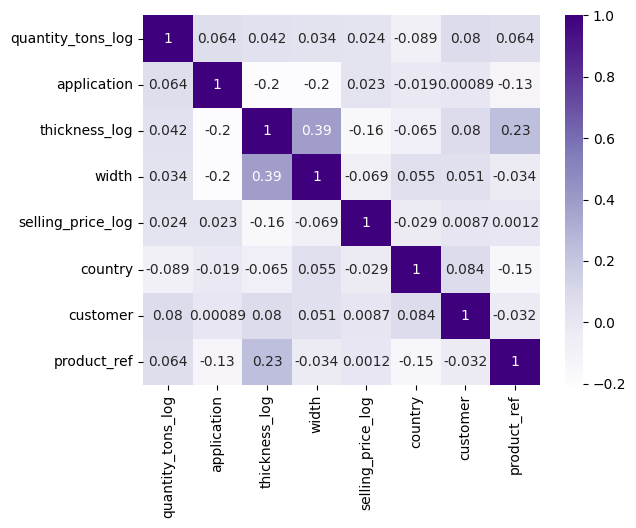

In [21]:
x=df1[['quantity_tons_log','application','thickness_log','width','selling_price_log','country','customer','product_ref']].corr()
sns.heatmap(x, annot=True, cmap="Purples")


In [22]:
x=df1[['quantity_tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y=df1['selling_price_log']

In [23]:
ohe = OneHotEncoder(handle_unknown = 'ignore')
ohe.fit(x[['item type']])
x_ohe = ohe.fit_transform(x[['item type']]).toarray()
ohe1 = OneHotEncoder(handle_unknown = 'ignore')
ohe1.fit(x[['status']])
x_ohe1 = ohe1.fit_transform(x[['status']]).toarray()
x = np.concatenate((x[['quantity_tons_log','application','thickness_log','width','country','customer','product_ref']].values, x_ohe,x_ohe1),axis=1)
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [24]:
dtr = DecisionTreeRegressor()
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}

In [25]:
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R_squared:', r2)

Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
Mean squared error: 0.03382346682359579
R_squared: 0.8979924023750239


In [26]:
sample = np.array([[np.log(40),10,np.log(250),0,28,30202938,1670798778,'PL','Won']])
sample_ohe =- ohe.transform(sample[:,[7]]).toarray()
sample_ohe1 = ohe1.transform(sample[:,[8]]).toarray()
sample = np.concatenate((sample[:,[0,1,2,3,4,5,6]],sample_ohe,sample_ohe1),axis = 1)
sample1 = scaler.transform(sample)
pred = best_model.predict(sample1)
print("Predicted selling price: ", np.exp(pred))


Predicted selling price:  [692.03360941]


In [100]:
with open('model.pkl','wb') as file:
    pickle.dump(best_model, file)
with open('scalerl.pkl','wb') as file:
    pickle.dump(scaler, file)
with open('t.pkl','wb') as file:
    pickle.dump(ohe, file)
with open('s.pkl','wb') as file:
    pickle.dump(ohe1, file)

In [39]:
enc = OrdinalEncoder()
df1['status'] = enc.fit_transform(df1[['status']])

en1 = OrdinalEncoder()
df1['item type'] = en1.fit_transform(df1[['item type']])

In [40]:
x = df1[['quantity_tons_log','selling_price_log','item type','application','thickness_log','width','country','customer','product_ref']]
y = df1[['status']]

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [76]:
model_2 = ExtraTreesClassifier()
model_2.fit(x_train, y_train)

ExtraTreesClassifier()

In [78]:
x_test_pred_2 = model_2.predict(x_test)
print("accuracy : ", accuracy_score(y_test, x_test_pred_2))
print(classification_report(y_test, x_test_pred_2))

accuracy :  0.8624638678596008
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       653
         1.0       0.82      0.81      0.81      6863
         2.0       0.75      0.72      0.74      3920
         3.0       1.00      0.40      0.57         5
         4.0       0.50      0.33      0.40         9
         5.0       0.47      0.37      0.42       830
         6.0       0.76      0.69      0.72       851
         7.0       0.90      0.92      0.91     23194

    accuracy                           0.86     36325
   macro avg       0.78      0.66      0.70     36325
weighted avg       0.86      0.86      0.86     36325



Confusion Matrix:
[[    0     0     0     0     0     0     0   653]
 [    0     0     0     0     0     0     0  6863]
 [    0     0     0     0     0     0     0  3920]
 [    0     0     0     0     0     0     0     5]
 [    0     0     0     0     0     0     0     9]
 [    0     0     0     0     0     0     0   830]
 [    0     0     0     0     0     0     0   851]
 [    0     0     0     0     0     0     0 23194]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       653
         1.0       0.00      0.00      0.00      6863
         2.0       0.00      0.00      0.00      3920
         3.0       0.00      0.00      0.00         5
         4.0       0.00      0.00      0.00         9
         5.0       0.00      0.00      0.00       830
         6.0       0.00      0.00      0.00       851
         7.0       0.64      1.00      0.78     23194

    accuracy                           0.64     36325
   macro

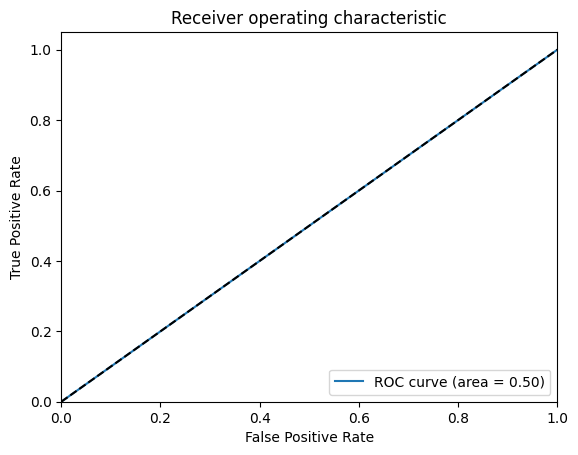

In [84]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [87]:
file = open("Indutrial_copper_model.pkl", "wb")
pickle.dump(model, file)
file.close()     